<a href="https://colab.research.google.com/github/Snowy1013z/airbnb_socal_covid/blob/main/Copy_of_574_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/Spring2025/DSO574/HW1')

# Confirm that the files are accessible
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Copy of 574-HW1.ipynb',
 'Data Files [Summary]',
 'Data Files [Detailed]',
 'Overview of Data Files [Please Read First].gdoc',
 'Combined Listing Data [Summary].csv',
 'Combined Listing Data [Detailed].csv',
 'Calendar Data [Temp].csv',
 'HW1.ipynb',
 'Note .gdoc']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf


In [ ]:
# calendar_data=pd.read_csv('Calendar Data [Temp].csv')
# calendar_data.head()

In [ ]:
summary_data=pd.read_csv('Combined Listing Data [Summary].csv')


<ipython-input-38-dbb9848613dd>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  summary_data=pd.read_csv('Combined Listing Data [Summary].csv')


In [ ]:
summary_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [ ]:

import pandas as pd

# Extract year and month using regex
summary_data[['year', 'month']] = summary_data['Scrape File'].str.extract(r'_(\d{4})_(\d{2})_')

# Convert to integer type
summary_data[['year', 'month']] = summary_data[['year', 'month']].astype(int)

summary_data['date'] = summary_data['year'].astype(str) + '-' + summary_data['month'].astype(str).str.zfill(2)
summary_data.head()



,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,date
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,...,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,...,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,...,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,...,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,...,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015,5,2015-05


In [ ]:
# prompt: show all column names of summary_data

summary_data.columns


Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Scrape File', 'year', 'month', 'date'],
      dtype='object')

In [ ]:
 summary_data['neighbourhood_group'].value_counts(normalize=True,dropna=False)

,proportion
neighbourhood_group,
City of Los Angeles,0.526400
Other Cities,0.248169
NaN,0.173185
Unincorporated Areas,0.052246


In [ ]:
summary_data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,year,month,date
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,...,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,...,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,...,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,...,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015,5,2015-05
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,...,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015,5,2015-05


In [ ]:
# prompt: help me check if NAN value in neighbourhood_group is present in which year of data

nan_years = summary_data[summary_data['neighbourhood_group'].isna()]['year'].unique()
print(f"Years with NaN values in 'neighbourhood_group': {nan_years}")


Years with NaN values in 'neighbourhood_group': [2015 2016 2017 2018]


In [ ]:
# prompt: show me the data for id = 6431889

# Assuming 'id' is a column in your summary_data DataFrame
id_to_find = 6431889
row = summary_data[summary_data['id'] == id_to_find]

if not row.empty:
  print(row)
else:
  print(f"No data found for id = {id_to_find}")


         Unnamed: 0       id                               name   host_id  \
1                 1  6431889    Turquoise Jewel at Venice Beach  18993265   
18926          4407  6431889    Turquoise Jewel at Venice Beach  18993265   
44397         14154  6431889  Turquoise Jewel-Venice Beach-1 Bd  18993265   
64353         17066  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
84294         17985  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
104540        17669  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
129233        21471  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
155540        22303  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
180309        20992  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
205526        22837  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
240847        27996  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   
251349         7245  6431889  1 Bd + Parking, ½ Block to Beach!  18993265   

In [ ]:
# prompt: filter summary_data with no NAN value in neighbourhood_group

summary_data_filtered = summary_data.dropna(subset=['neighbourhood_group'])



In [ ]:
summary_data_filtered.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Scrape File', 'year', 'month', 'date'],
      dtype='object')

In [ ]:
# prompt: take id, date, year, month,host_id, neighbourhood,neighbourhood_group,'latitude', 'longitude','room_type' and group by on these columns, get count of id as number of listing, average price, average minimum_nights, avergae number of reviews, average reviews_per_month ,average availability_365--use summary_data_filtered

# Group by specified columns and calculate aggregate statistics
grouped_data = summary_data_filtered.groupby(['id', 'date', 'year', 'month', 'host_id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'room_type']).agg(
    number_of_listings=('id', 'count'),
    average_price=('price', 'mean'),
    average_minimum_nights=('minimum_nights', 'mean'),
    average_number_of_reviews=('number_of_reviews', 'mean'),
    average_reviews_per_month=('reviews_per_month', 'mean'),
    average_availability_365=('availability_365', 'mean')
).reset_index()

grouped_data


,id,date,year,month,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365
0,109,2018-04,2018,4,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,0.0
1,109,2018-05,2018,5,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,25.0
2,109,2018-06,2018,6,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,52.0
3,109,2018-07,2018,7,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,82.0
4,109,2018-08,2018,8,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350689,47389079,2021-01,2021,1,299035083,Downtown,City of Los Angeles,34.047020,-118.260440,Private room,1,150.0,30.0,1.0,1.00,256.0
1350690,47389243,2021-01,2021,1,372613526,Arcadia,Other Cities,34.123990,-118.019270,Private room,1,45.0,1.0,0.0,NaN,0.0
1350691,47389382,2021-01,2021,1,14936368,Mar Vista,City of Los Angeles,34.003460,-118.434800,Entire home/apt,1,72.0,30.0,0.0,NaN,28.0
1350692,47389961,2021-01,2021,1,372613526,Arcadia,Other Cities,34.123400,-118.017890,Entire home/apt,1,120.0,3.0,0.0,NaN,0.0


In [ ]:
grouped_data.shape

(1350694, 16)

In [ ]:
# prompt: show me distinct value for column number_of_listings in grouped_data

print(grouped_data['number_of_listings'].unique())


[1]


In [ ]:
# prompt: show me the data for id = 6431889 for this grouped_data

# Assuming 'grouped_data' is already defined as in your previous code

id_to_find = 6431889
row = grouped_data[grouped_data['id'] == id_to_find]

if not row.empty:
  print(row)
else:
  print(f"No data found for id = {id_to_find}")


             id     date  year  month   host_id neighbourhood  \
176465  6431889  2018-04  2018      4  18993265        Venice   
176466  6431889  2018-05  2018      5  18993265        Venice   
176467  6431889  2018-06  2018      6  18993265        Venice   
176468  6431889  2018-07  2018      7  18993265        Venice   
176469  6431889  2018-08  2018      8  18993265        Venice   
176470  6431889  2018-09  2018      9  18993265        Venice   
176471  6431889  2018-10  2018     10  18993265        Venice   
176472  6431889  2018-11  2018     11  18993265        Venice   
176473  6431889  2018-12  2018     12  18993265        Venice   
176474  6431889  2019-01  2019      1  18993265        Venice   
176475  6431889  2019-02  2019      2  18993265        Venice   
176476  6431889  2019-03  2019      3  18993265        Venice   
176477  6431889  2019-04  2019      4  18993265        Venice   
176478  6431889  2019-05  2019      5  18993265        Venice   
176479  6431889  2019-06 

In [ ]:
grouped_data.columns

Index(['id', 'date', 'year', 'month', 'host_id', 'neighbourhood',
       'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'number_of_listings', 'average_price', 'average_minimum_nights',
       'average_number_of_reviews', 'average_reviews_per_month',
       'average_availability_365'],
      dtype='object')

In [ ]:
import pandas as pd

# Ensure unique neighbourhood-year pairs by counting unique listing IDs
cluster_data = grouped_data.groupby(['neighbourhood', 'year'])['id'].nunique().reset_index()

# Pivot data to get neighborhoods as rows and years as columns
cluster_pivot = cluster_data.pivot(index='neighbourhood', columns='year', values='id').fillna(0)

# Reset index to get neighbourhood back as a column
cluster_pivot.reset_index(inplace=True)

print(cluster_pivot.head())  # Check the structure


year    neighbourhood   2018   2019   2020   2021
0               Acton    5.0    6.0    7.0    5.0
1     Adams-Normandie  122.0  112.0   83.0   40.0
2        Agoura Hills   70.0   68.0   57.0   41.0
3          Agua Dulce   15.0   17.0   16.0   16.0
4            Alhambra  382.0  461.0  473.0  307.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a new column for the average number of listings in 2018 and 2019
cluster_pivot['avg_listings_2018_2019'] = (cluster_pivot[2018] + cluster_pivot[2019]) / 2

# Select only the relevant column for clustering
data_for_clustering = cluster_pivot[['avg_listings_2018_2019']]


# Standardize the data
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Apply K-Means Clustering (choosing 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_pivot['cluster'] = kmeans.fit_predict(data_for_clustering_scaled)


# View results
print(cluster_pivot[['neighbourhood', 'avg_listings_2018_2019', 'cluster']].head())


year    neighbourhood  avg_listings_2018_2019  cluster
0               Acton                     5.5        0
1     Adams-Normandie                   117.0        0
2        Agoura Hills                    69.0        0
3          Agua Dulce                    16.0        0
4            Alhambra                   421.5        0


In [ ]:
# prompt: show head of cluster pivot in descending order of avg_listings_2018_2019

# Sort the cluster_pivot DataFrame by 'avg_listings_2018_2019' in descending order
cluster_pivot_sorted = cluster_pivot.sort_values(by='avg_listings_2018_2019', ascending=False)

# Display the head of the sorted DataFrame
print(cluster_pivot_sorted.head())


year neighbourhood    2018    2019    2020    2021  avg_listings_2018_2019  \
104      Hollywood  4285.0  4594.0  3315.0  1660.0                  4439.5   
237         Venice  3728.0  3974.0  2889.0  1593.0                  3851.0   
60        Downtown  2667.0  3059.0  2560.0  1105.0                  2863.0   
135     Long Beach  2087.0  2542.0  2470.0  1612.0                  2314.5   
197   Santa Monica  1857.0  1816.0  2061.0  1170.0                  1836.5   

year  cluster  
104         1  
237         1  
60          1  
135         1  
197         2  


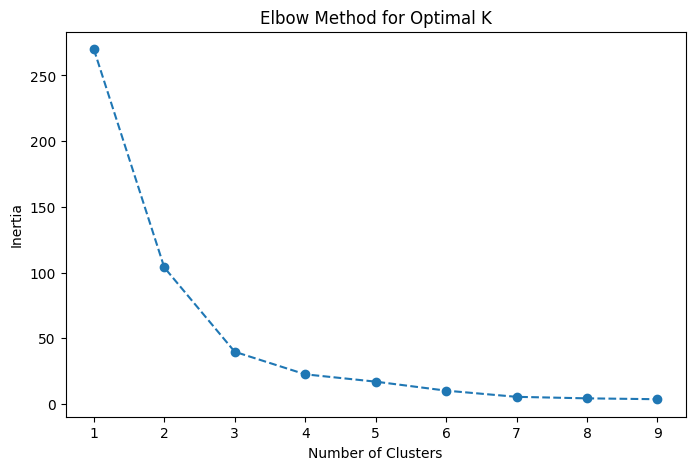

In [ ]:
import matplotlib.pyplot as plt

# Try different values of K
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


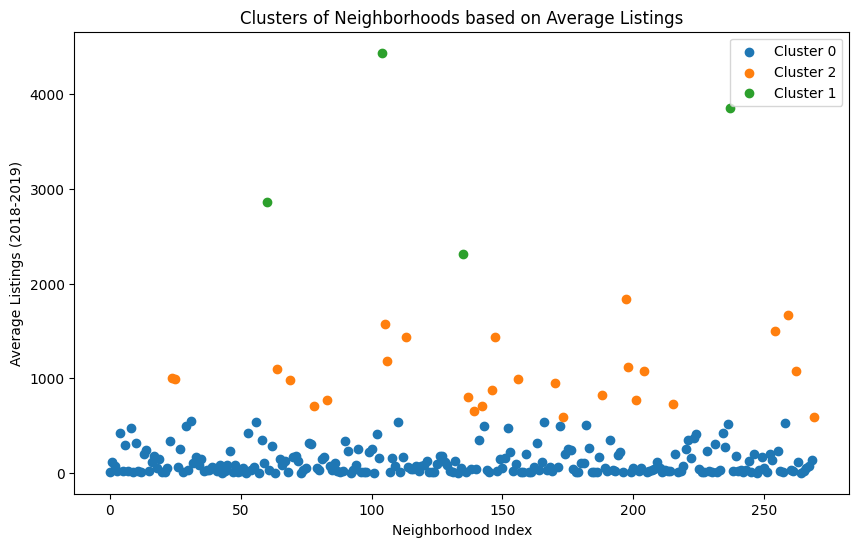

In [ ]:
# prompt: plot all the clusters formed  for cluster pivot

import matplotlib.pyplot as plt

# Assuming cluster_pivot is already defined as in your previous code

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in cluster_pivot['cluster'].unique():
    cluster_subset = cluster_pivot[cluster_pivot['cluster'] == cluster]
    plt.scatter(cluster_subset.index, cluster_subset['avg_listings_2018_2019'], label=f'Cluster {cluster}')

plt.xlabel('Neighborhood Index')
plt.ylabel('Average Listings (2018-2019)')
plt.title('Clusters of Neighborhoods based on Average Listings')
plt.legend()
plt.show()


till here


     neighbourhood   2018   2019   2020   2021  avg_listings_2018_2019  \
0            Acton    5.0    6.0    7.0    5.0                     5.5   
1  Adams-Normandie  122.0  112.0   83.0   40.0                   117.0   
2     Agoura Hills   70.0   68.0   57.0   41.0                    69.0   
3       Agua Dulce   15.0   17.0   16.0   16.0                    16.0   
4         Alhambra  382.0  461.0  473.0  307.0                   421.5   

   cluster  neighborhood_count  
0        0                 239  
1        0                 239  
2        0                 239  
3        0                 239  
4        0                 239  


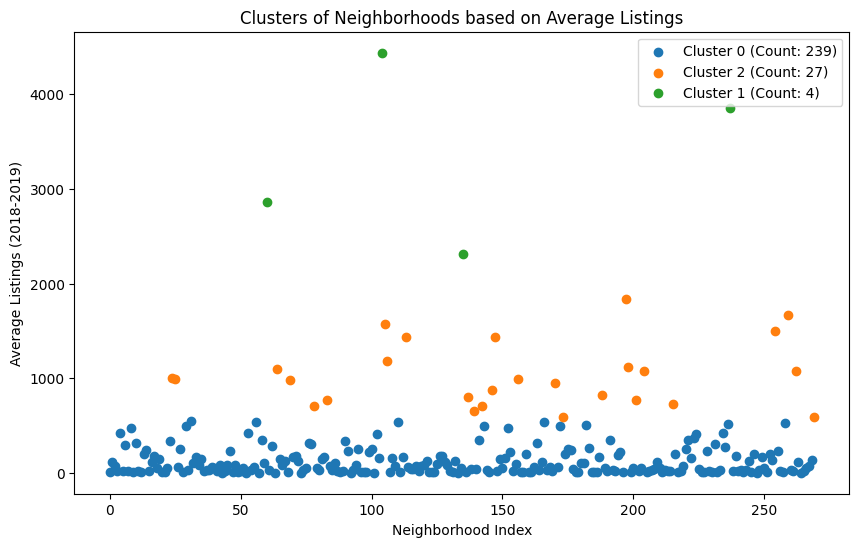

In [ ]:
# prompt: calculate the number of neighbourhoods in different clusters. add values in the graph

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the number of neighborhoods in each cluster
cluster_counts = cluster_pivot.groupby('cluster')['neighbourhood'].count().reset_index()
cluster_counts.rename(columns={'neighbourhood': 'neighborhood_count'}, inplace=True)

# Merge the counts back into the cluster_pivot DataFrame
cluster_pivot = pd.merge(cluster_pivot, cluster_counts, on='cluster', how='left')

# Now, you have a 'neighborhood_count' column in cluster_pivot
print(cluster_pivot.head())

# Plotting with neighborhood counts
plt.figure(figsize=(10, 6))
for cluster in cluster_pivot['cluster'].unique():
    cluster_subset = cluster_pivot[cluster_pivot['cluster'] == cluster]
    plt.scatter(cluster_subset.index, cluster_subset['avg_listings_2018_2019'], label=f'Cluster {cluster} (Count: {cluster_subset["neighborhood_count"].iloc[0]})')

plt.xlabel('Neighborhood Index')
plt.ylabel('Average Listings (2018-2019)')
plt.title('Clusters of Neighborhoods based on Average Listings')
plt.legend()
plt.show()


In [ ]:
grouped_data.head()

,id,date,year,month,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,cluster
0,109,2018-04,2018,4,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,0.0,0
1,109,2018-05,2018,5,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,25.0,0
2,109,2018-06,2018,6,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,52.0,0
3,109,2018-07,2018,7,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,82.0,0
4,109,2018-08,2018,8,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,114.0,0


In [ ]:
grouped_data['id'].nunique()

111617

In [ ]:
grouped_data['host_id'].nunique()

53287

In [ ]:
grouped_data.columns

Index(['id', 'date', 'year', 'month', 'host_id', 'neighbourhood',
       'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'number_of_listings', 'average_price', 'average_minimum_nights',
       'average_number_of_reviews', 'average_reviews_per_month',
       'average_availability_365', 'cluster_x', 'cluster_y', 'cluster'],
      dtype='object')

In [ ]:
# prompt: using grouped_data, calculate the average of number of listings per cluster group

# Calculate the average number of listings per cluster
average_listings_per_cluster = grouped_data.groupby('cluster')['average'].mean()

average_listings_per_cluster


,number_of_listings
cluster,
0,1.0
1,1.0
2,1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


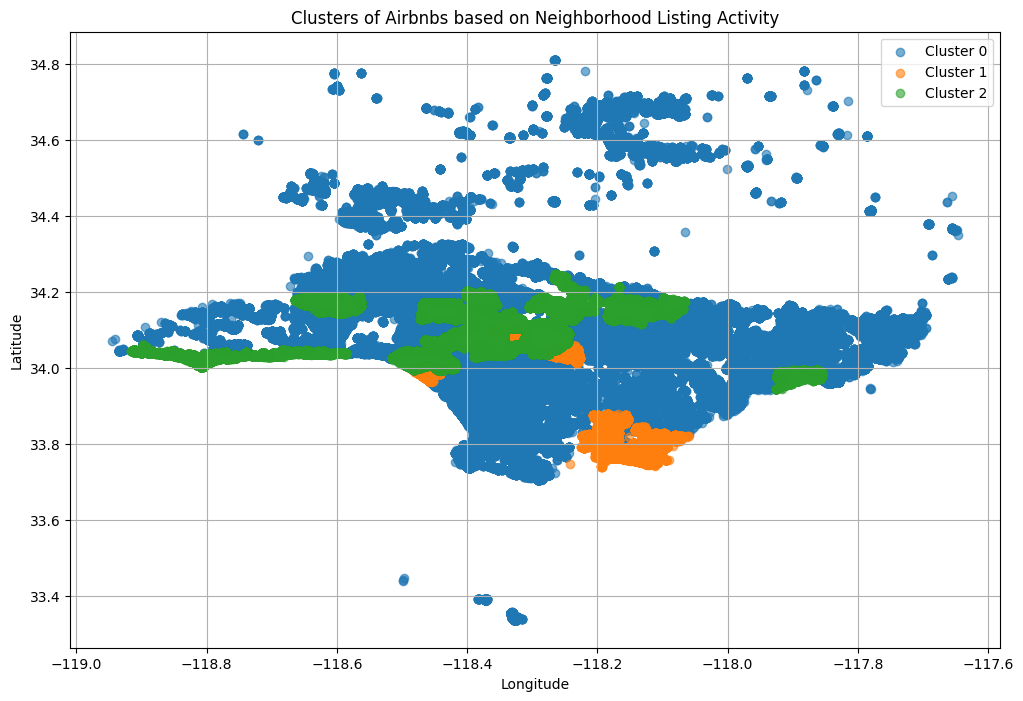

In [ ]:
# prompt: add the clusters in main grouped_data and help me visualize the clusters using latitude and longitude

import pandas as pd
import matplotlib.pyplot as plt
# Merge the cluster information back into the grouped_data DataFrame
grouped_data = pd.merge(grouped_data, cluster_pivot[['neighbourhood', 'cluster']], on='neighbourhood', how='left')

# Now you can visualize the clusters using latitude and longitude
plt.figure(figsize=(12, 8))
for cluster in grouped_data['cluster'].unique():
    cluster_subset = grouped_data[grouped_data['cluster'] == cluster]
    plt.scatter(cluster_subset['longitude'], cluster_subset['latitude'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Airbnbs based on Neighborhood Listing Activity')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
grouped_data.head()

,id,date,year,month,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,number_of_listings,average_price,average_minimum_nights,average_number_of_reviews,average_reviews_per_month,average_availability_365,cluster
0,109,2018-04,2018,4,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,0.0,0
1,109,2018-05,2018,5,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,25.0,0
2,109,2018-06,2018,6,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,52.0,0
3,109,2018-07,2018,7,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,82.0,0
4,109,2018-08,2018,8,521,Culver City,Other Cities,33.982095,-118.384935,Entire home/apt,1,122.0,7.0,2.0,0.02,114.0,0


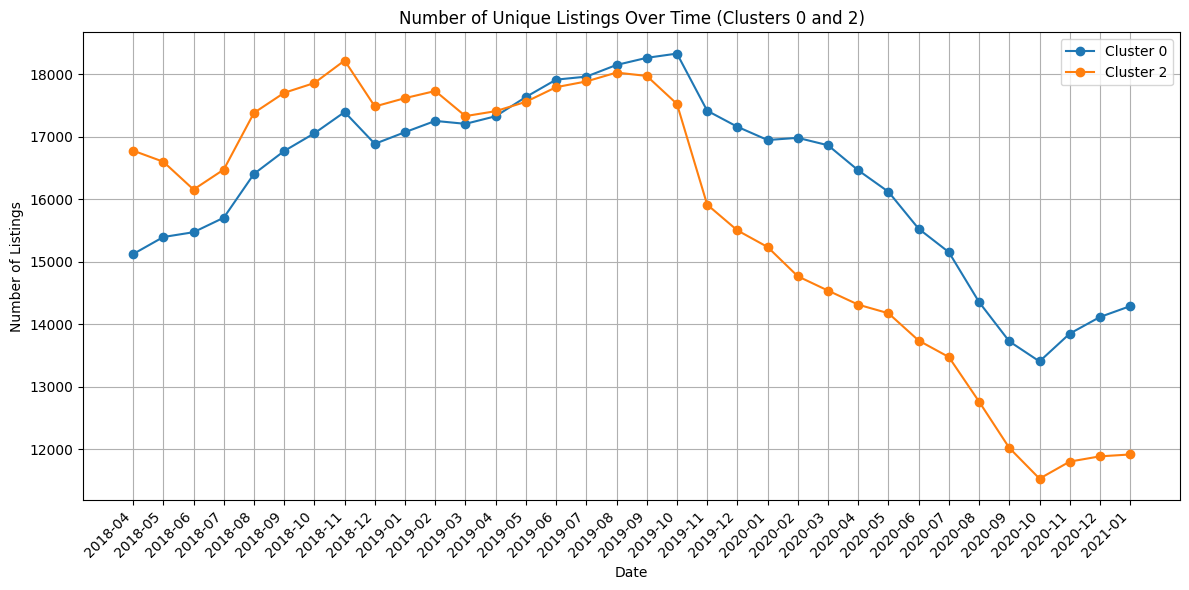

In [ ]:
# prompt: help me visualize how number of listings by calculating unique number of ids, chanaged over time for cluster 0 and 2  . arrnage graph in ascending order of time

import matplotlib.pyplot as plt

# Assuming 'grouped_data' and 'cluster_pivot' are already defined from your previous code

# Filter data for clusters 0 and 2
cluster_data_filtered = grouped_data[grouped_data['cluster'].isin([0, 2])]

# Group by cluster, date, and count unique IDs
listing_counts = cluster_data_filtered.groupby(['cluster', 'date'])['id'].nunique().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for cluster in [0, 2]:
    cluster_subset = listing_counts[listing_counts['cluster'] == cluster]
    plt.plot(cluster_subset['date'], cluster_subset['id'], label=f'Cluster {cluster}', marker='o')

plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.title('Number of Unique Listings Over Time (Clusters 0 and 2)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(True)
plt.show()


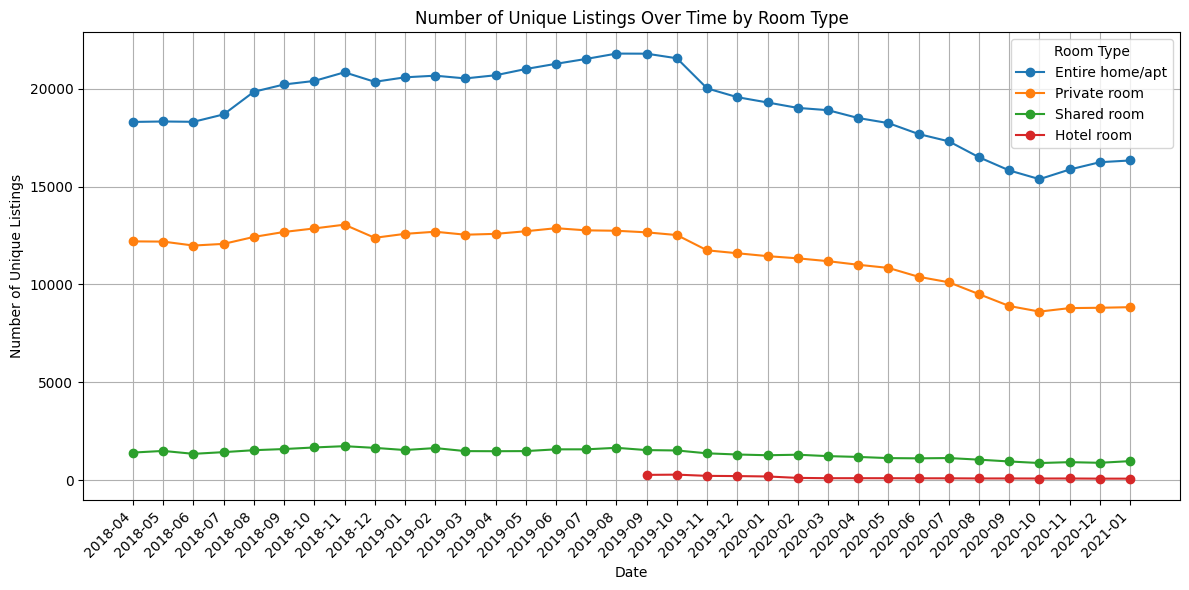

In [ ]:
import matplotlib.pyplot as plt

# Filter data for clusters 0 and 2
cluster_data_filtered = grouped_data[grouped_data['cluster'].isin([0, 2])]

# Group by date and room_type, then count unique IDs
listing_counts = cluster_data_filtered.groupby(['date', 'room_type'])['id'].nunique().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for room_type in listing_counts['room_type'].unique():
    room_subset = listing_counts[listing_counts['room_type'] == room_type]
    plt.plot(room_subset['date'], room_subset['id'], label=room_type, marker='o')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Number of Unique Listings')
plt.title('Number of Unique Listings Over Time by Room Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title="Room Type")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.grid(True)

# Show the plot
plt.show()


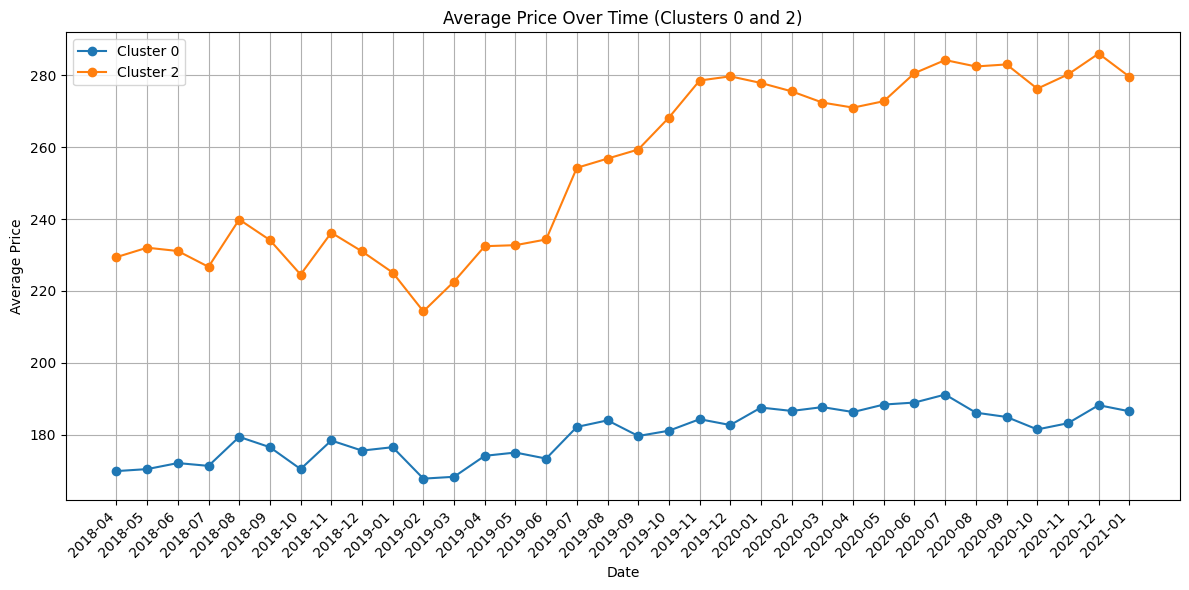

In [ ]:
# prompt: help me visualize how average_price, chanaged over time for cluster 0 and 2  . arrnage graph in ascending order of time

import matplotlib.pyplot as plt

# Assuming 'grouped_data' is already defined and contains 'cluster', 'date', and 'average_price' columns

# Filter data for clusters 0 and 2
cluster_data_filtered = grouped_data[grouped_data['cluster'].isin([0, 2])]

# Group by cluster and date, then calculate the average price
average_prices = cluster_data_filtered.groupby(['cluster', 'date'])['average_price'].mean().reset_index()

# Sort the data by date in ascending order
average_prices = average_prices.sort_values('date')

# Create the plot
plt.figure(figsize=(12, 6))
for cluster in [0, 2]:
    cluster_subset = average_prices[average_prices['cluster'] == cluster]
    plt.plot(cluster_subset['date'], cluster_subset['average_price'], label=f'Cluster {cluster}', marker='o')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time (Clusters 0 and 2)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(True)
plt.show()


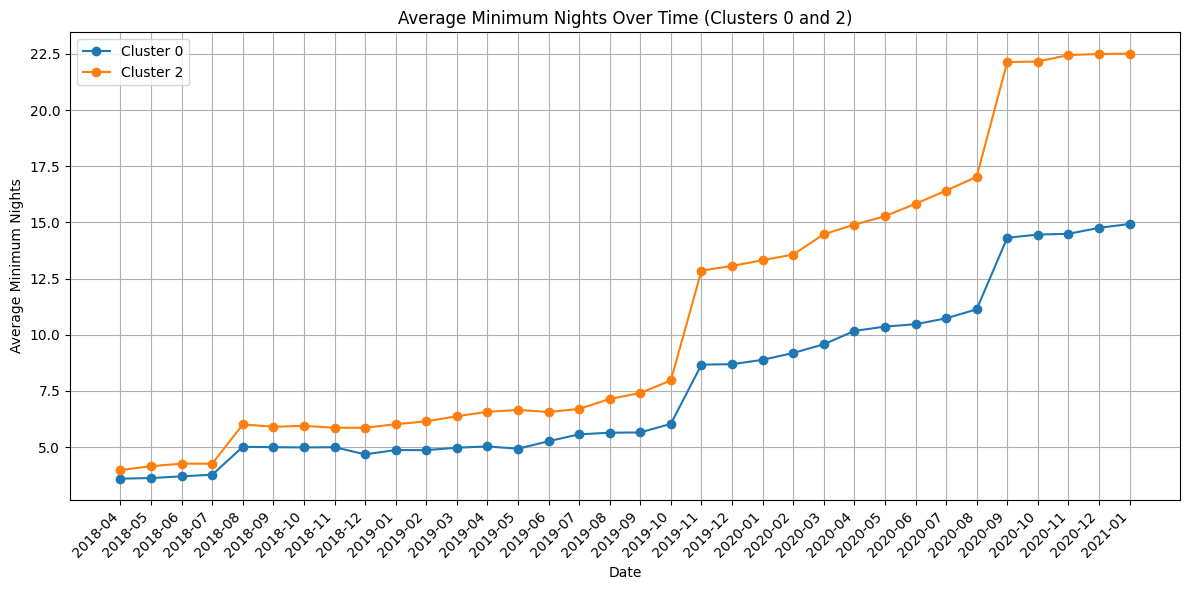

In [ ]:
# prompt: help me visualize how average_minimum_nights, chanaged over time for cluster 0 and 2  . arrnage graph in ascending order of time

import matplotlib.pyplot as plt
# Assuming 'grouped_data' is already defined and contains 'cluster', 'date', and 'average_minimum_nights' columns

# Filter data for clusters 0 and 2
cluster_data_filtered = grouped_data[grouped_data['cluster'].isin([0, 2])]

# Group by cluster and date, then calculate the average minimum nights
average_minimum_nights = cluster_data_filtered.groupby(['cluster', 'date'])['average_minimum_nights'].mean().reset_index()

# Sort the data by date in ascending order
average_minimum_nights = average_minimum_nights.sort_values('date')

# Create the plot
plt.figure(figsize=(12, 6))
for cluster in [0, 2]:
    cluster_subset = average_minimum_nights[average_minimum_nights['cluster'] == cluster]
    plt.plot(cluster_subset['date'], cluster_subset['average_minimum_nights'], label=f'Cluster {cluster}', marker='o')

plt.xlabel('Date')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights Over Time (Clusters 0 and 2)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(True)
plt.show()


In [ ]:
# prompt: calculate listing per host_id by calculating count of unique id for each host_id for cluster 0 and 2 over time

# Assuming 'grouped_data' is already defined and contains 'host_id', 'cluster', and 'date' columns

# Filter data for clusters 0 and 2
cluster_data_filtered = grouped_data[grouped_data['cluster'].isin([0, 2])]

# Group by host_id, cluster, and date, then count unique listing IDs
listing_counts_by_host = cluster_data_filtered.groupby(['host_id', 'cluster', 'date'])['id'].nunique().reset_index()

# Rename the 'id' column to 'unique_listings'
listing_counts_by_host.rename(columns={'id': 'unique_listings'}, inplace=True)

# Now you have a DataFrame listing_counts_by_host with columns: host_id, cluster, date, unique_listings

print(listing_counts_by_host.head())


   host_id  cluster     date  unique_listings
0       59        2  2018-04                1
1       59        2  2018-05                1
2       59        2  2018-06                1
3       59        2  2018-07                1
4       59        2  2018-08                1


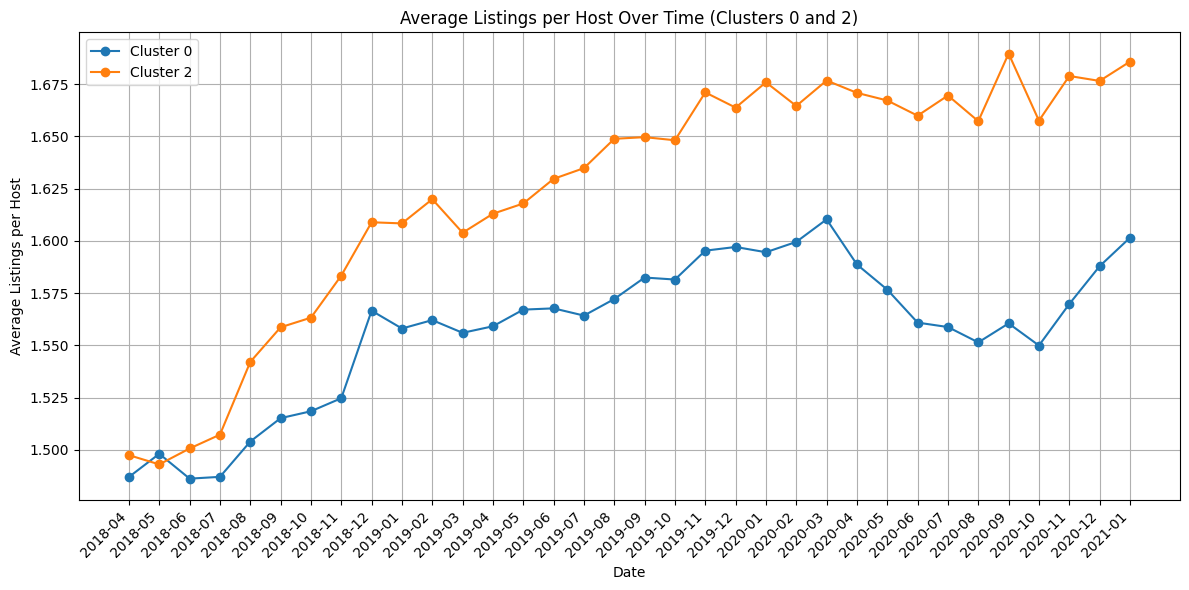

In [ ]:
# prompt: calculate avergae listing count per host for neighbourhood for cluster 0 and 2  and visulaize .show how it chnaged over time arrnage graph in ascending order of time

import matplotlib.pyplot as plt

# Assuming 'listing_counts_by_host' DataFrame is available from the previous code

# Group by cluster, date, and calculate the average number of listings per host
avg_listings_per_host = listing_counts_by_host.groupby(['cluster', 'date'])['unique_listings'].mean().reset_index()

# Filter for clusters 0 and 2
avg_listings_per_host_filtered = avg_listings_per_host[avg_listings_per_host['cluster'].isin([0, 2])]

# Sort by date
avg_listings_per_host_filtered = avg_listings_per_host_filtered.sort_values('date')

# Create the plot
plt.figure(figsize=(12, 6))
for cluster in [0, 2]:
    cluster_subset = avg_listings_per_host_filtered[avg_listings_per_host_filtered['cluster'] == cluster]
    plt.plot(cluster_subset['date'], cluster_subset['unique_listings'], label=f'Cluster {cluster}', marker='o')

plt.xlabel('Date')
plt.ylabel('Average Listings per Host')
plt.title('Average Listings per Host Over Time (Clusters 0 and 2)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
